In [2]:
import numpy as np
import matplotlib.pyplot as plt

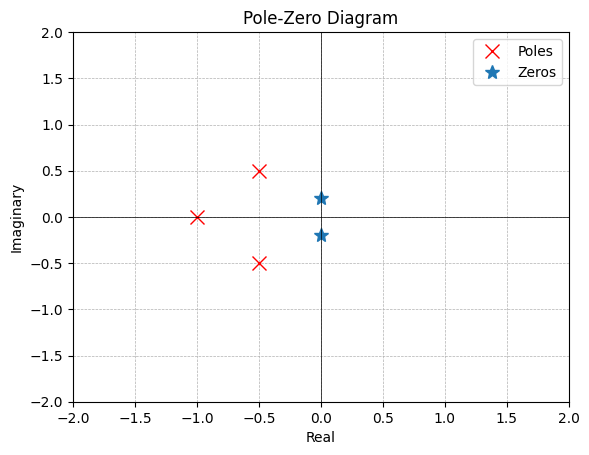

In [6]:
def plot_pole_zero(poles, zeros):
  fig, ax = plt.subplots()

  #Polting poles
  ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles' )

  #Plotting zeros
  ax.plot(np.real(zeros), np.imag(zeros), '*', markersize=10, label='Zeros')

  #Set Plotting attributes
  ax.axhline(0, color='black', linewidth=0.5)
  ax.axvline(0, color='black', linewidth=0.5)
  ax.grid(True, which='both', linestyle='--', linewidth=0.5)
  ax.legend()
  ax.set_xlabel('Real')
  ax.set_ylabel('Imaginary')
  ax.set_title('Pole-Zero Diagram')
  #Plotting limits
  ax.set_xlim([-2,2])
  ax.set_ylim([-2, 2])

  plt.show()


poles = [-0.5+0.5j, -0.5-0.5j, -1.0]
zeros = [0.2j, -0.2j]

plot_pole_zero(poles, zeros)

[15. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]


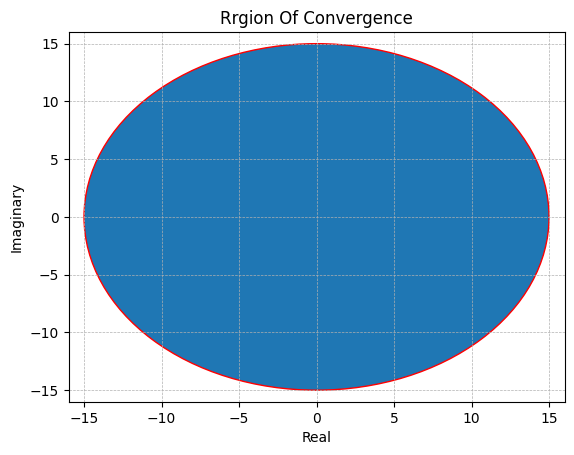

Z-transformation values:
Z[0] = (15+0j)
Z[1] = (-2.500000000000001+3.4409548011779334j)
Z[2] = (-2.5+0.8122992405822647j)
Z[3] = (-2.499999999999999-0.8122992405822673j)
Z[4] = (-2.4999999999999956-3.440954801177935j)
ROC: [Z] < 15.0


In [16]:
def Z_Transformation(signal, n):
  N = len(signal)
  Z = np.zeros(N, dtype=complex)

  for k in range(N):
    Z[k] = np.sum(signal * np.exp(-1j * 2 * np.pi * n * k / N))

  roc = 'Entire Z-Plane'
  if np.abs(Z).any():
    roc = f'ROC: [Z] < {np.max(np.abs(Z))}'

  return Z, roc

signal = [1, 2, 3, 4, 5]
n = np.arange(len(signal))
Z, roc = Z_Transformation(signal, n)
print(Z)

# Plotting ROC
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), radius=np.max(np.abs(Z)), edgecolor='r')
ax.add_patch(circle)

plt.xlim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1)
plt.ylim(-np.max(np.abs(Z))-1, np.max(np.abs(Z))+1)

plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Rrgion Of Convergence')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Printing the values of Z
print('Z-transformation values:')
for k, z in enumerate(Z):
  print(f'Z[{k}] = {z}')

print(roc)